In [1]:
!pip install mysql-connector-python pandas matplotlib requests sqlalchemy

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/9c/88/bc13c33fca11acaf808bd1809d8602d78f5bb84f7b1e7b1a288c383a14fd/mysql_connector_python-9.5.0-cp311-cp311-win_amd64.whl.metadata
  Using cached mysql_connector_python-9.5.0-cp311-cp311-win_amd64.whl.metadata (7.5 kB)
Using cached mysql_connector_python-9.5.0-cp311-cp311-win_amd64.whl (16.5 MB)


### Impoated Liabraries: 

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sqlalchemy import create_engine

### Python to communicate with the MySQL database

In [3]:
import mysql.connector
print("mysql connector imported")

mysql connector imported


### Check Python Executable Path

In [4]:
import sys
print(sys.executable)

C:\Users\admin\anaconda3\python.exe


### Install MySQL Connector for Active Python Environment

In [5]:
!{sys.executable} -m pip install mysql-connector-python

In [6]:
!pip uninstall mysql-connector-python -y

!pip install pymysql

Found existing installation: mysql-connector-python 9.5.0
Uninstalling mysql-connector-python-9.5.0:
  Successfully uninstalled mysql-connector-python-9.5.0


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_vend

### Connect Python to MySQL Using PyMySQL

In [7]:
import pymysql

conn = pymysql.connect(
    host="localhost",
    user="root",
    password="divkrish",
    database="book_db"
)

cursor = conn.cursor()
print("Connected to MySQL successfully using pymysql")

Connected to MySQL successfully using pymysql


### Create Feedback Table in MySQL Database

In [8]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS books (
    id INT NOT NULL PRIMARY KEY AUTO_INCREMENT,
    title VARCHAR(255),
    author VARCHAR(255),
    published_year INT,
    genre VARCHAR(100)
)
""")
conn.commit()
print("Table created successfully!")

Table created successfully!


In [23]:
# Create
def add_book(title, author, published_year, genre):
    cursor.execute(
        "INSERT INTO books (title, author, published_year, genre) VALUES (%s, %s, %s, %s)",
        (title, author, published_year, genre)
    )
    conn.commit()
    print(f"Book '{title}' added successfully!")

In [24]:
# Read
def get_books():
    cursor.execute("SELECT * FROM books")
    return cursor.fetchall()


In [25]:
# Update
def update_book(book_id, title=None, author=None, year=None, genre=None):
    updates = []
    values = []
    if title: 
        updates.append("title=?")
        values.append(title)
    if author: 
        updates.append("author=?")
        values.append(author)
    if year: 
        updates.append("published_year=?")
        values.append(year)
    if genre: 
        updates.append("genre=?")
        values.append(genre)
    values.append(book_id)
    query = f"UPDATE books SET {', '.join(updates)} WHERE id=?"
    cursor.execute(query, tuple(values))
    conn.commit()
    print(f"Book ID {book_id} updated successfully!")

In [26]:
# Delete
def delete_book(book_id):
    cursor.execute("DELETE FROM books WHERE id=?", (book_id,))
    conn.commit()
    print(f"Book ID {book_id} deleted successfully!")

In [27]:
def fetch_book_from_api(title):
    url = f"https://www.googleapis.com/books/v1/volumes?q={title}"
    response = requests.get(url).json()
    if "items" in response:
        book = response["items"][0]["volumeInfo"]
        return {
            "title": book.get("title", "Unknown"),
            "author": ", ".join(book.get("authors", ["Unknown"])),
            "published_year": int(book.get("publishedDate","0")[:4]) if book.get("publishedDate") else None,
            "genre": book.get("categories", ["Unknown"])[0]
        }
    else:
        print("Book not found in API.")
        return None

In [28]:
book_data = fetch_book_from_api("Harry Potter")

if book_data:
    add_book(**book_data)

Book 'Harry Potter' added successfully!


In [31]:
df = pd.read_sql("SELECT * FROM books", conn)
df

add_book("The Hobbit", "J.R.R. Tolkien", 1937, "Fantasy")
add_book("Clean Code", "Robert C. Martin", 2008, "Programming")
add_book("Atomic Habits", "James Clear", 2018, "Self-Help")


df = pd.read_sql("SELECT * FROM books", conn)
df

Book 'The Hobbit' added successfully!
Book 'Clean Code' added successfully!
Book 'Atomic Habits' added successfully!


C:\Users\admin\AppData\Local\Temp\ipykernel_10584\3789003532.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM books", conn)
C:\Users\admin\AppData\Local\Temp\ipykernel_10584\3789003532.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM books", conn)


,id,title,author,published_year,genre
0,1,Harry Potter,J. K. Rowling,2007,"Fantasy fiction, English"
1,2,The Hobbit,J.R.R. Tolkien,1937,Fantasy
2,3,Clean Code,Robert C. Martin,2008,Programming
3,4,Atomic Habits,James Clear,2018,Self-Help
4,5,The Hobbit,J.R.R. Tolkien,1937,Fantasy
5,6,Clean Code,Robert C. Martin,2008,Programming
6,7,Atomic Habits,James Clear,2018,Self-Help


In [32]:
# update
cursor.execute(
    "UPDATE books SET genre=%s WHERE title=%s",
    ("Fiction", "Atomic Habits")
)
conn.commit()

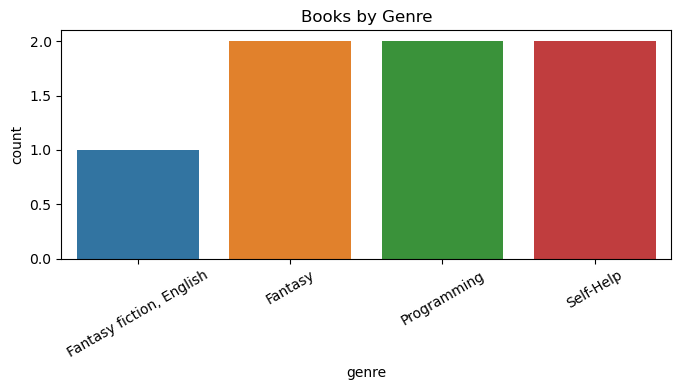

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="genre")
plt.title("Books by Genre")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

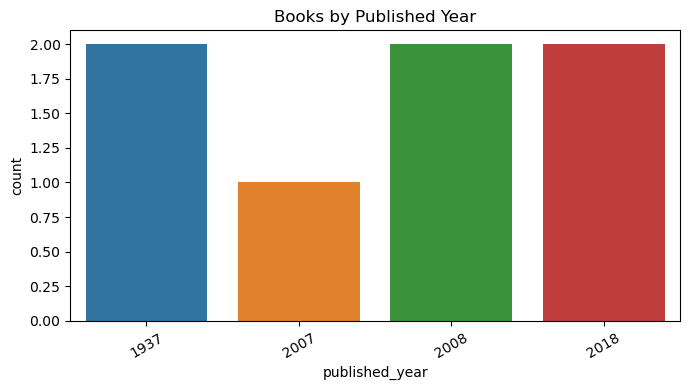

In [35]:
##Books by year:

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="published_year")
plt.title("Books by Published Year")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Overview:

This notebook demonstrates a simple full-stack data engineering workflow:
- CRUD operations using Python and MySQL
- External API integration using Google Books API
- Data storage in relational database
- Basic data visualization using Matplotlib and Seaborn

This project was built as part of a technical assessment.